# Лабораторная 1




Работать будем с функцией $f(x) = x^4+x^2+x+1$. Для начала построим ее график:

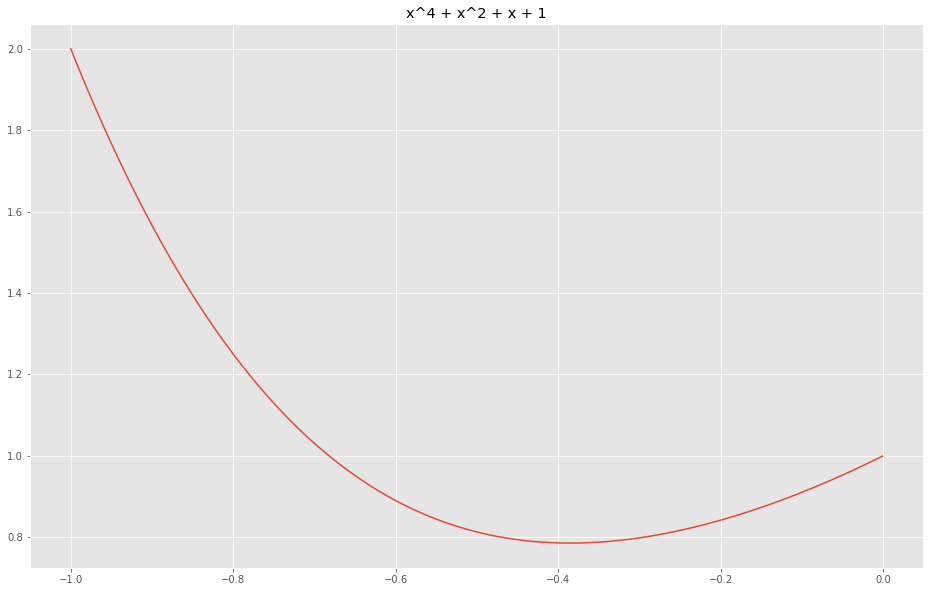

In [17]:
import numpy as np
from numpy import power as pow
import matplotlib.pyplot as plt
from random import uniform as uni

def myfunc(x):
    return pow(x, 4) + pow(x, 2) + x + 1


def myfunc_prime(x):
    return 4 * pow(x, 3) + 2 * x + 1


def myfunc_second(x):
    return 12 * pow(x, 2) + 2

def plot(x, y, label_x="", label_y="", title=""):
    plt.style.use('ggplot')
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()

a = -1
b = 0
e = 0.001

x = np.arange(a, b, e)
y = myfunc(x)

plot(x, y, title = "x^4 + x^2 + x + 1")

### Задание 1,2

**Метод перебора**

In [4]:
def brute(fun, a, b, e):
    x = np.arange(a, b, e)
    return x[np.argmin(fun(x))], x.size

print("x_opt = %f\ni = %d" % brute(myfunc, a, b, e))

%timeit brute(myfunc, a, b, e)

x_opt = -0.385000
i = 1000
134 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод порязрядного поиска**

In [5]:
n = 4

def bitwise_search(fun, a, b, e, n, n_):
    d = (b - a) / n
    x0 = a
    i = 0
    for _ in range(0, n_):
        f0 = fun(x0)
        x1 = x0 + d
        f1 = fun(x1)
        if f0 > f1:
            x0 += d
            if (x0 > b):
                raise Exception("Most likely your function is not unimodal")
        else:
            a = x1 - 2 * d
            b = x1
            d /= n
            x0 = a
        i += 1
        if np.abs(f0 - f1) < e:
            break
    x_opt = (a + b) / 2
    return x_opt, i

print("x_opt = %f\ni = %d" % bitwise_search(myfunc, a, b, e, 4, 20))

%timeit bitwise_search(myfunc, a, b, e, 4, 20)

x_opt = -0.375000
i = 13
236 µs ± 962 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Модель дихотомии**

In [6]:
def bisection(fun_prime, a, b, e):
    i = 0
    c = (a + b) / 2
    while (b - a) / 2 > e:
        if fun_prime(c) == 0:
            i += 1
            return c, i
        elif fun_prime(a) * fun_prime(c) < 0:
            i += 1
            b = c
        else:
            a = c
        c = (a + b) / 2
    return c, i


print("x_opt = %f\ni = %d" % bisection(myfunc_prime, a, b, e))

%timeit bisection(myfunc_prime, a, b, e)

x_opt = -0.385742
i = 4
131 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод золотого сечения**

In [7]:
def gss(fun, a, b, e):
    i = 0
    gr = (np.sqrt(5) + 1) / 2  # equals 1.618....
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > e:
        if fun(c) < fun(d):
            i += 1
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2, i

print("x_opt = %f\ni = %d" % gss(myfunc, a, b, e))

%timeit gss(myfunc, a, b, e)

x_opt = -0.385438
i = 6
247 µs ± 8.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Метод парабол**

In [8]:
def parabolic_select_helper(fun, a, b, n):
    for _ in range(0, n):
        x = sorted([uni(a, b) for _ in range(0, 3)])
        if fun(x[0]) >= fun(x[1]) <= fun(x[2]):
            return x
    raise Exception("Most likely your function is not unimodal")


def parabolic_interp(fun, a, b, e, n):
    x0, x1, x2 = parabolic_select_helper(fun, a, b, 100)
    i = 0
    f0 = fun(x0)
    f1 = fun(x1)
    f2 = fun(x2)

    for _ in range(0, n):
        a1 = (f1 - f0) / (x1 - x0)
        a2 = (1 / (x2 - x1)) * (((f2 - f0) / (x2 - x0)) - ((f1 - f0) / (x1 - x0)))
        if i == 0:
            X = 0.5 * (x0 + x1 - a1 / a2)
        else:
            X2 = 0.5 * (x0 + x1 - a1 / a2)
            if np.abs(X2 - X) < e:
                i += 1
                return X2, i
            else:
                X = X2
        f_min = fun(X)
        i += 1
        if X < x2:
            x2 = x1
            f2 = f1
            x1 = X
            f1 = f_min
        else:
            x0 = x1
            f0 = f1
            x1 = X
            f1 = f_min
            
print("x_opt = %f\ni = %d" % parabolic_interp(myfunc, a, b, e, 20))

%timeit parabolic_interp(myfunc, a, b, e, 20)

x_opt = -0.385445
i = 5
150 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод средней точки**

In [9]:
def middle_point(fun_prime, a, b, e, n):
    i = 0
    for _ in range(0, n):
        i += 1
        x = (a + b) / 2
        f_p = fun_prime(x)
        if np.abs(f_p) < e:
            return x, i
        else:
            if f_p > 0:
                b = x
            else:
                a = x

print("x_opt = %f\ni = %d" % parabolic_interp(myfunc, a, b, e, 20))

%timeit parabolic_interp(myfunc, a, b, e, 20)

x_opt = -0.384515
i = 7
153 µs ± 5.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Метод хорд**

In [10]:
def chords(fun_prime, a, b, e, n):
    i = 0
    for _ in range(0, n):
        i += 1
        X = a - (fun_prime(a) / (fun_prime(a) - fun_prime(b))) * (a - b)
        f_p = fun_prime(X)
        if np.abs(f_p) < e:
            return X, i
        else:
            if f_p > 0:
                b = X
            else:
                a = X

print("x_opt = %f\ni = %d" % chords(myfunc_prime, a, b, e, 100))

%timeit chords(myfunc_prime, a, b, e, 100)

x_opt = -0.385203
i = 12
361 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Метод Ньтона**

In [21]:
def newton(fun_prime, fun_second, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = fun_prime(x)
        ddf = fun_second(x)
        i += 1
        if np.abs(df) < e:
            i += 1
            return x, i
        else:
            x = x - df / ddf
        
print("x_opt = %f\ni = %d" % newton(myfunc_prime, myfunc_second, -0.4, e, 100))

%timeit newton(myfunc_prime, myfunc_second, -0.4, e, 100)

x_opt = -0.385714
i = 3
28.3 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Задание 3

Populating the interactive namespace from numpy and matplotlib


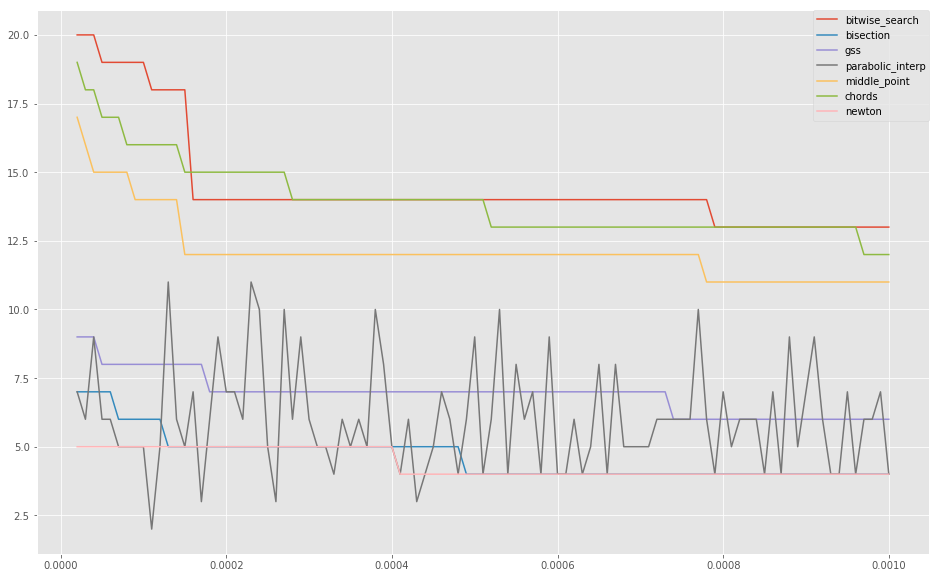

In [16]:
def massive_test(fun, fun_prime, fun_second, a, b, n, x0, e_start, e_end, e_step):
    test = {}
    test["bitwise_search"] = [[bitwise_search(fun, a, b, e, 4, n)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["brute"] = [[brute(fun, a, b, e, )[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["bisection"] = [[bisection(fun_prime, a, b, e)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["gss"] = [[gss(fun, a, b, e)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["parabolic_interp"] = [[parabolic_interp(fun, a, b, e, n)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["middle_point"] = [[middle_point(fun_prime, a, b, e, n)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["chords"] = [[chords(fun_prime, a, b, e, n)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    test["newton"] = [[newton(fun_prime, fun_second, x0, e, n)[1], e] for e in np.arange(e_start, e_end, -e_step)]
    return test

def unpack(data):
    return [d[1] for d in data], [d[0] for d in data]


def plot_test(data):
    plt.style.use('ggplot')
    x, y = unpack(data.get("bitwise_search")[:])
    plt.plot(x, y, label="bitwise_search")
    x, y = unpack(data.get("bisection")[:])
    plt.plot(x, y, label="bisection")
    x, y = unpack(data.get("gss")[:])
    plt.plot(x, y, label="gss")
    x, y = unpack(data.get("parabolic_interp")[:])
    plt.plot(x, y, label="parabolic_interp")
    x, y = unpack(data.get("middle_point")[:])
    plt.plot(x, y, label="middle_point")
    x, y = unpack(data.get("chords")[:])
    plt.plot(x, y, label="chords")
    x, y = unpack(data.get("newton")[:])
    plt.plot(x, y, label="newton")
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.show()

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

data = massive_test(myfunc, myfunc_prime, myfunc_second, a, b, 100, -0.3, 0.001, 0.00001, 0.00001)

plot_test(data)

### Задание 4

Методы использующие данные о проиводной целевой функции: 
- метод дихотомии
- метод средней точки
- метод хорд и метод Ньютона.

**Левая производная**

**Метод дихотомии**

### Задание 5

$f(x) = x*arct(x-\frac{1}{2} ln(1+x^2))$

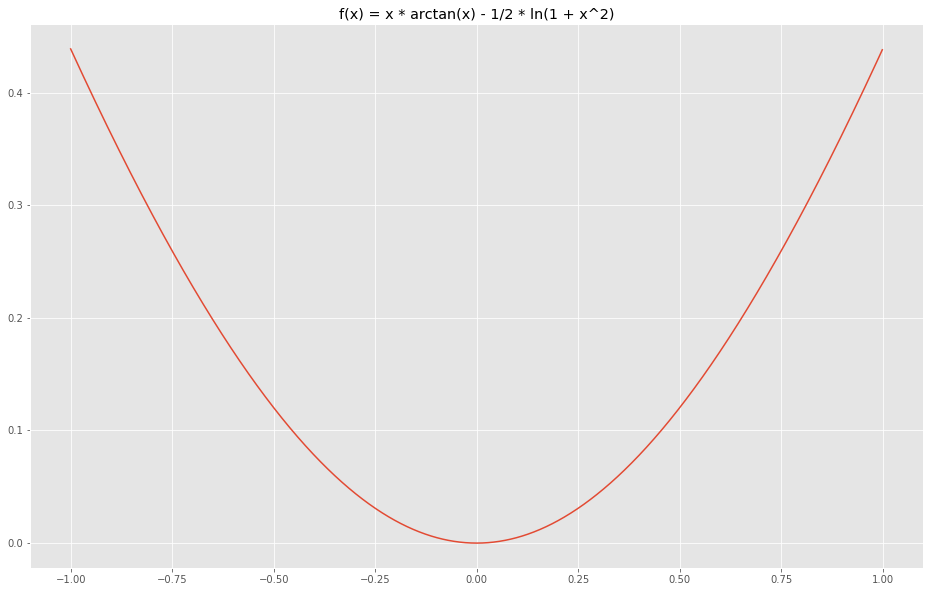

In [38]:
from scipy.misc import derivative

def newton_numeric(fun, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = derivative(fun, x, n=1)
        ddf = derivative(fun, x, n=2)
        i += 1
        if np.abs(df) < e:
            i += 1
            return x, i
        else:
            x = x - df / ddf

            
fun5 = lambda x: x*np.arctan(x)-1/2*np.log(1+pow(x, 2))
d_fun5 = lambda x: np.arctan(x)
dd_fun5 = lambda x: 1/(pow(x, 2) + 1)

from scipy.misc import derivative


def newton_test_diff_type(fun, fun_prime, fun_second, a, b, e, n):
    newton_num = {}
    newton_analit = {}
    for x0 in np.arange(a, b, 0.01):
        newton_num[x0] = newton_numeric(fun, x0, e, n)[1]
        newton_analit[x0] = newton(fun_prime, fun_second, x0, e, n)[1]

    return [newton_num, newton_analit]

x = np.arange(-1, 1, 0.001)

y = fun5(x)
plot(x, y, title="f(x) = x * arctan(x) - 1/2 * ln(1 + x^2)")

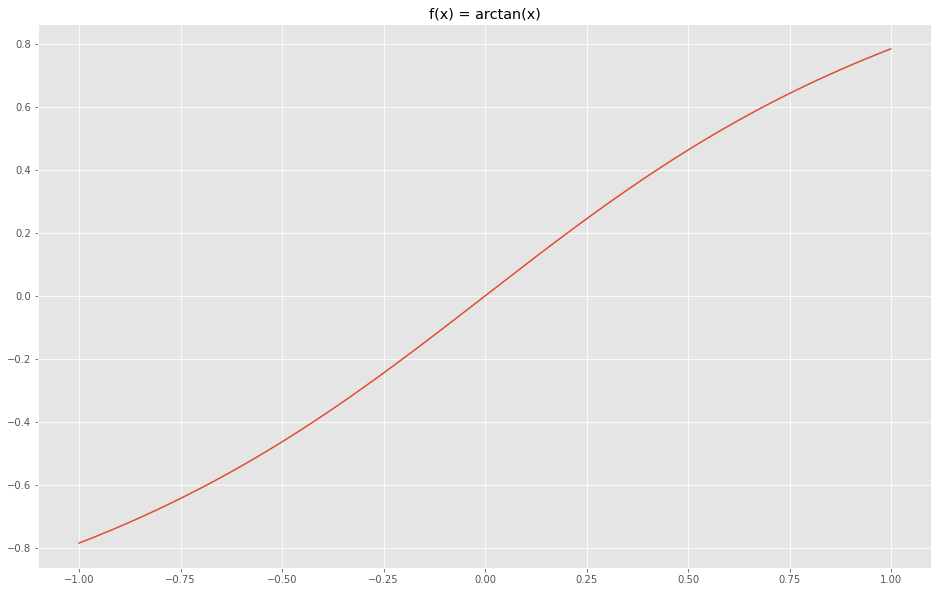

In [39]:
y = d_fun5(x)
plot(x, y, title="f(x) = arctan(x)")



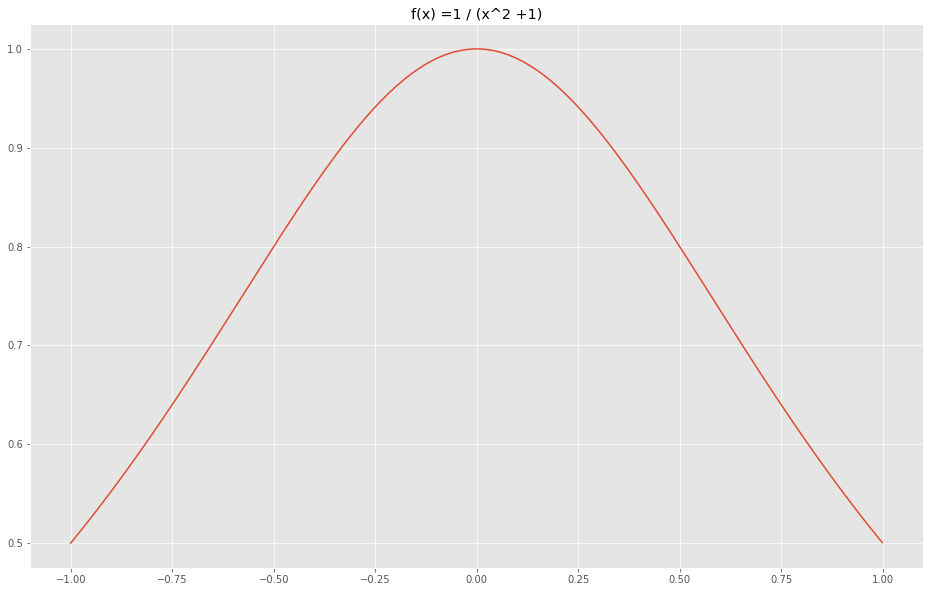

In [40]:
y = dd_fun5(x)
plot(x, y, title="f(x) =1 / (x^2 +1)")

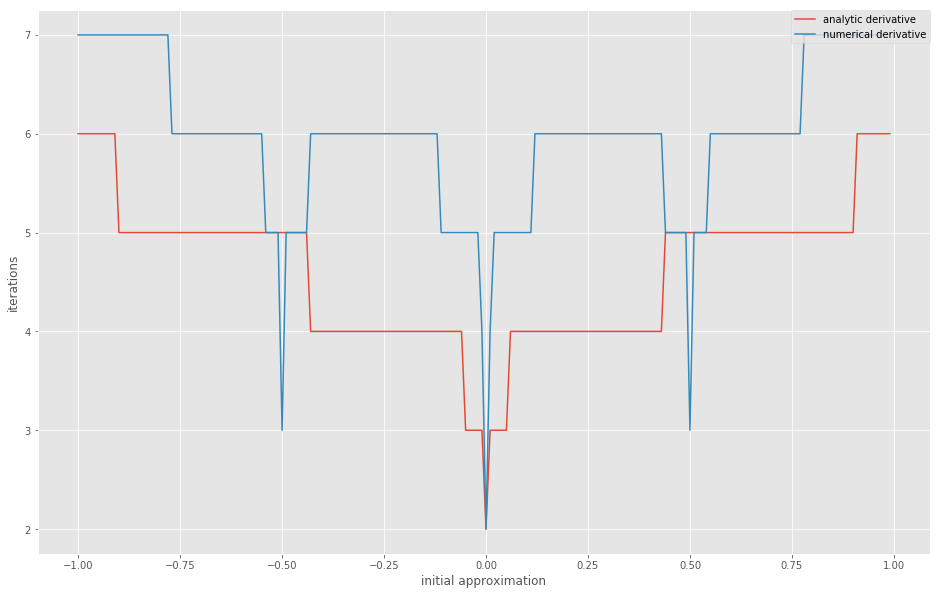

In [41]:
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[1]).items()))
plt.plot(x, y, label="analytic derivative")
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[0]).items()))
plt.plot(x, y,  label="numerical derivative")
plt.xlabel("initial approximation")
plt.ylabel("iterations")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()

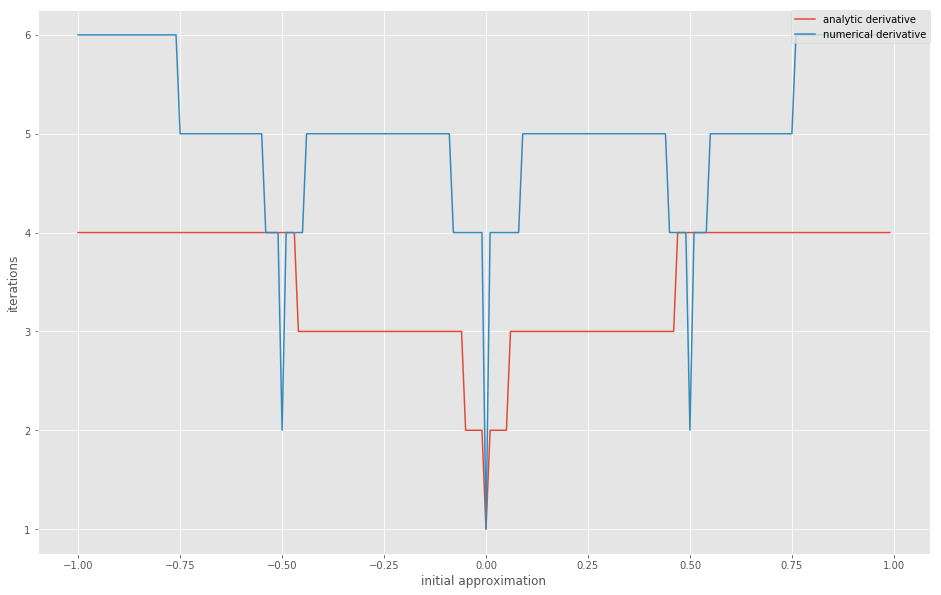

In [34]:
def newton_rafson(fun_prime, fun_second, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = fun_prime(x)
        ddf = fun_second(x)
        if np.abs(df) < e:
            i += 1
            return x, i
        else:
            xl = x - df / ddf
            dfxl = fun_prime(xl)
            t = pow(df, 2) / (pow(df, 2) + pow(dfxl, 2))
            x = x - t * df / ddf
            i += 1

            
def newton_rafson_numeric(fun, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = derivative(fun, x, n=1)
        ddf = derivative(fun, x, n=2)
        if np.abs(df) < e:
            i += 1
            return x, i
        else:
            xl = x - df / ddf
            dfxl = derivative(fun, xl, n=1)
            t = pow(df, 2) / (pow(df, 2) + pow(dfxl, 2))
            x = x - t * df / ddf
            i += 1

            
def newton_test_rafson_diff_type(fun, fun_prime, fun_second, a, b, e, n):
    newton_num = {}
    newton_analit = {}
    for x0 in np.arange(a, b, 0.01):
        newton_num[x0] = newton_rafson_numeric(fun, x0, e, n)[1]
        newton_analit[x0] = newton_rafson(fun_prime, fun_second, x0, e, n)[1]
    return [newton_num, newton_analit]


x, y = zip(*sorted((newton_test_rafson_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[1]).items()))
plt.plot(x, y, label="analytic derivative")
x, y = zip(*sorted((newton_test_rafson_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[0]).items()))
plt.plot(x, y,  label="numerical derivative")
plt.xlabel("initial approximation")
plt.ylabel("iterations")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()

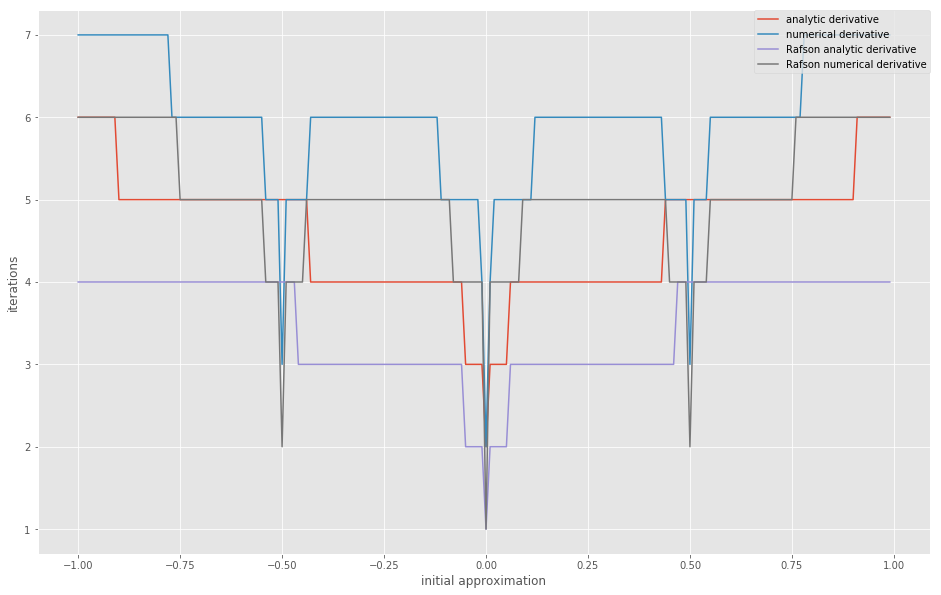

In [35]:
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[1]).items()))
plt.plot(x, y, label="analytic derivative")
x, y = zip(*sorted((newton_test_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[0]).items()))
plt.plot(x, y,  label="numerical derivative")
plt.xlabel("initial approximation")
plt.ylabel("iterations")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

x, y = zip(*sorted((newton_test_rafson_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[1]).items()))
plt.plot(x, y, label="Rafson analytic derivative")
x, y = zip(*sorted((newton_test_rafson_diff_type(fun5, d_fun5, dd_fun5, -1, 1, 0.0001, 100)[0]).items()))
plt.plot(x, y,  label="Rafson numerical derivative")
plt.xlabel("initial approximation")
plt.ylabel("iterations")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()